In [1]:
import os 
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import custom functions
os.chdir('..')
from FLOCK import DataLoading, Preprocessing, ClusteringFeats


Load data

In [2]:
# Initialize path to data (UTM-converted datasets)
data_dir = os.getcwd() + '\\SampleData'

# Load datasets
raw_datasets = DataLoading.load_data(data_dir)

# Re-shape datasets
datasets = DataLoading.pivot_datsets(raw_datasets)

Get the interpolated data

In [3]:
# get interpolated datasets
interp_datasets = Preprocessing.interpolate_datasets(datasets, threshold = 0.99)

Get movement periods


In [4]:
# get slices for movement periods and break times   
rucks_bySquad, rests_bySquad, all_stops = Preprocessing.get_slices_byArea(interp_datasets, plot=False)

Get the smoothed data of one example squad


In [5]:
smooth_rucks = Preprocessing.spline_smoothing(rucks_bySquad[0], s=3e1, UTM=True)

set up plot params

In [61]:
# get group member names
names = smooth_rucks[0].latitude.columns.tolist()
# define colors for all plots 
color_dictionary = dict(zip(names, sns.color_palette(as_cmap=True)[:len(names)]))

Get clusters over time

In [136]:
all_inertias, all_labels, all_scores = ClusteringFeats.cluster_for_separation(smooth_rucks, UTM=True, method='HDBSCAN', epsilon=10, min_cluster_size = 2)

Extracting separation metrics


Plot labels from the first movement period <br>Labels of -1 indicate an outlier, labels: 0, 1, 2 ect. are group numbers

<AxesSubplot:>

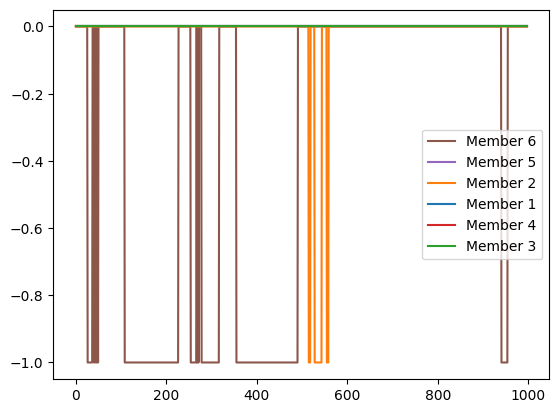

In [137]:
all_labels[0].plot(color = color_dictionary)

Get values for how many samples each individual is labelled as an outlier

In [140]:
outlier_times = ClusteringFeats.get_outlier_time(all_labels)
outlier_times[0]

Member 6    341.0
Member 5      0.0
Member 2     24.0
Member 1      0.0
Member 4      0.0
Member 3      0.0
Name: number of samples as outlier, dtype: float64

Get clusters over time, increase 'epsilon' (distance for combining clusters)<br>
to avoid micro-clustering

In [142]:
all_inertias, all_labels, all_scores = ClusteringFeats.cluster_for_separation(smooth_rucks, UTM=True, method='HDBSCAN', epsilon=25, min_cluster_size = 2)

Extracting separation metrics


Plot labels from the first movement period <br>Labels of -1 indicate an outlier, labels: 0, 1, 2 ect. are group numbers

<AxesSubplot:>

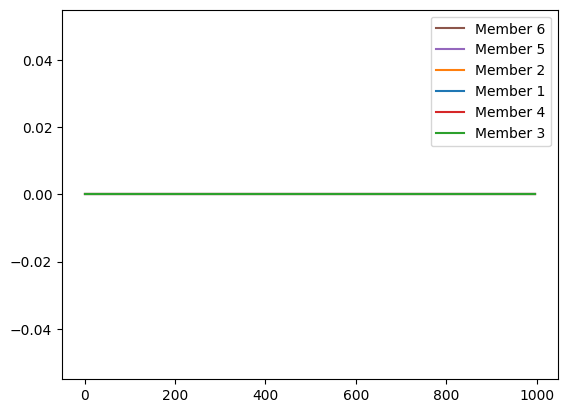

In [143]:
all_labels[0].plot(color = color_dictionary)

Even when there are no outliers detected, we can get metrics for how strong the spatial membership is to a group

In [85]:
timepoint = 150

Plot the 'membership confidence' metric over time for each individual

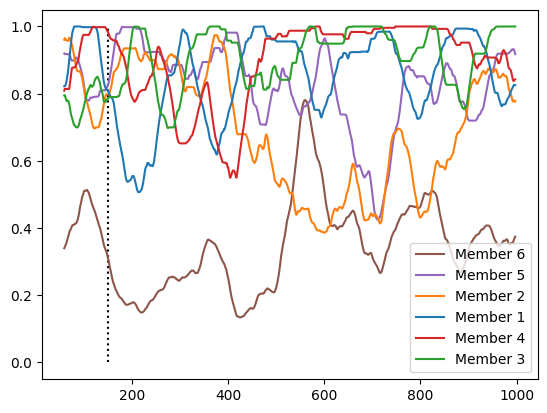

In [124]:
all_inertias[0].rolling(60).mean().plot(color=color_dictionary)
plt.vlines(timepoint, ymin=0, ymax=1, color='k', ls=':')

Plot the 'membership confidence' metric for each individual at one timepoint 

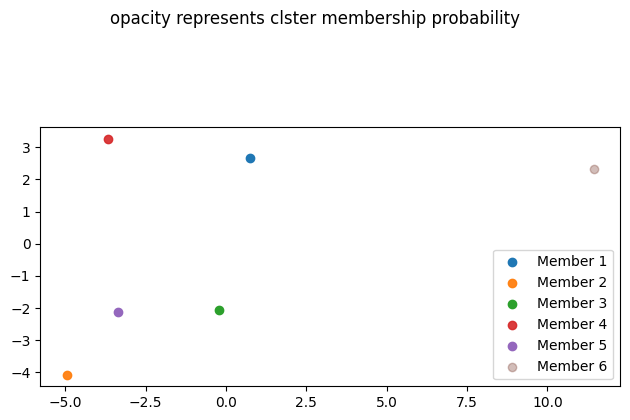

In [117]:
for X, Y, c, op, name in zip(smooth_rucks[0].iloc[timepoint].UTM_x, smooth_rucks[0].iloc[timepoint].UTM_y, color_dictionary.values(), all_inertias[0].iloc[timepoint].sort_index(), smooth_rucks[0].iloc[timepoint].UTM_x.index):
    plt.scatter(X - smooth_rucks[0].iloc[timepoint].UTM_x.mean(), Y - smooth_rucks[0].iloc[timepoint].UTM_y.mean(), c=c, alpha=op, label=name)
plt.gca().set_aspect('equal')
plt.suptitle('Opacity represents cluster membership probability')
plt.legend()
plt.tight_layout()

In [86]:
all_inertias[0].iloc[timepoint].sort_index()

Member 1    1.000000
Member 2    0.940530
Member 3    1.000000
Member 4    0.900897
Member 5    1.000000
Member 6    0.389041
Name: 150, dtype: float64